In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
def integer_to_one_hot(integer, min_val, max_val):
    vector_length = max_val - min_val + 1
    one_hot_vector = [0] * vector_length
    one_hot_vector[integer - min_val] = 1
    return one_hot_vector

integer = 4
min_val = 2
max_val = 7
one_hot = integer_to_one_hot(integer, min_val, max_val)
print(one_hot)

[0, 0, 1, 0, 0, 0]


In [3]:
import numpy as np
import os
data_dir = '../data/'
x_dataset = []
u_dataset = []
for item in os.listdir(data_dir):
    data_file_path = os.path.join(data_dir, item)

    # Check if the file is a directory
    if data_file_path.endswith('.npy') and os.path.exists(data_file_path):
        data_dict = np.load(data_file_path, allow_pickle=True).item()
        x_data = data_dict['signals'][:, :-6]
        if x_data.shape[0]!= 3417 or x_data.shape[1]!= 68:
            print(data_file_path)
        uu_data = data_dict['signals'][:, -4:]
        ErrorType = data_dict['ErrorType']
        et = np.array(integer_to_one_hot(ErrorType, min_val, max_val))
        et_data = np.tile(et, (len(x_data), 1))
        u_data = np.concatenate((uu_data, et_data), axis=1)
        x_dataset.append(x_data)
        u_dataset.append(u_data)
        print(data_file_path)
        # break


../data/Case_4_1_9.npy
../data/Case_3_1_17.npy
../data/Case_2_1_17.npy
../data/Case_6_1_20.npy
../data/Case_7_1_20.npy
../data/Case_2_1_16.npy
../data/Case_3_1_16.npy
../data/Case_4_1_8.npy
../data/Case_2_1_14.npy
../data/Case_3_1_14.npy
../data/Case_3_1_15.npy
../data/Case_2_1_15.npy
../data/Case_2_1_11.npy
../data/Case_3_1_11.npy
../data/Case_3_1_10.npy
../data/Case_2_1_10.npy
../data/Case_3_1_12.npy
../data/Case_2_1_12.npy
../data/Case_5_1_9.npy
../data/Case_7_1_18.npy
../data/Case_6_1_18.npy
../data/Case_6_1_19.npy
../data/Case_7_1_19.npy
../data/Case_5_1_8.npy
../data/Case_2_1_13.npy
../data/Case_3_1_13.npy
../data/Case_2_1_7.npy
../data/Case_3_1_2.npy
../data/Case_5_1_11.npy
../data/Case_4_1_11.npy
../data/Case_4_1_10.npy
../data/Case_3_1_3.npy
../data/Case_5_1_10.npy
../data/Case_2_1_6.npy
../data/Case_2_1_4.npy
../data/Case_4_1_12.npy
../data/Case_5_1_12.npy
../data/Case_3_1_1.npy
../data/Case_7_1_9.npy
../data/Case_7_1_8.npy
../data/Case_5_1_13.npy
../data/Case_4_1_13.npy
../d

In [4]:
def cut_slides(data, window_size, predict_num):
    data_slices = []
    for i in range(0, data.shape[0], window_size):
        for j in range(window_size - predict_num + 1):
            slice = data[i+j:i+j+predict_num,:].reshape((1, predict_num, -1))
            data_slices.append(slice)
    return data_slices

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
window_size = np.shape(x_dataset[0])[0]
predict_num = 10
print(window_size)
x_data = np.concatenate(x_dataset, axis=0)
u_data = np.concatenate(u_dataset, axis=0)
x_scaler = MinMaxScaler()
u_scaler = MinMaxScaler()
x_data_scaled = x_scaler.fit_transform(x_data)
u_data_scaled = u_scaler.fit_transform(u_data)
x_data_slices = cut_slides(x_data_scaled, window_size, predict_num)
u_data_slices = cut_slides(u_data_scaled, window_size, predict_num)
x_data_slices = np.concatenate(x_data_slices, axis=0)
u_data_slices = np.concatenate(u_data_slices, axis=0)
print(np.shape(x_data_slices))
print(np.shape(u_data_slices))

3417
(408960, 10, 68)
(408960, 10, 10)


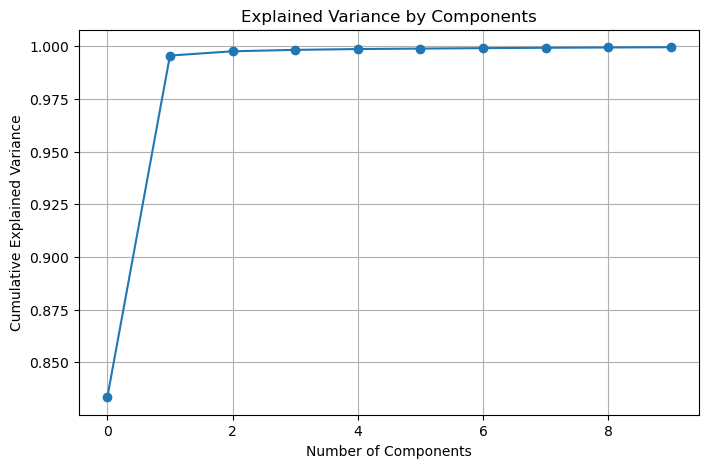

In [6]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=10)
x_data_pca = pca.fit_transform(x_data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 可视化累积解释方差
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# plt.yscale('log')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

In [7]:
explained_variance_ratio

array([8.33364009e-01, 1.62226891e-01, 2.02516194e-03, 6.75425981e-04,
       3.89101973e-04, 2.23129856e-04, 2.06661758e-04, 1.73675233e-04,
       1.34637649e-04, 1.26631765e-04])

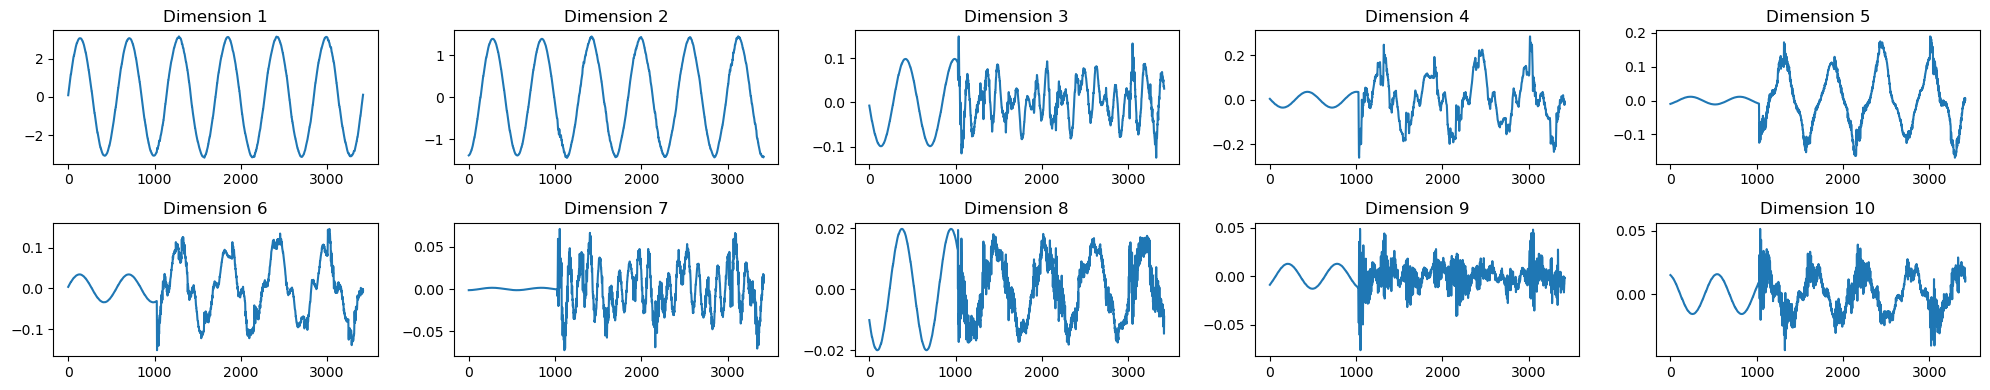

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming you have already defined x_dataset, x_scaler, and pca

ks = random.sample(range(len(x_dataset)), 1)
num_rows = len(ks) * 2
num_cols = 5

num_plots = num_rows * num_cols

# Ensure that there are enough dimensions in all datasets
assert all(num_plots <= x_dataset[k].shape[1] for k in ks)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 2))

for dataset_idx, k in enumerate(ks):
    xx = x_dataset[k]
    xx = x_scaler.transform(xx)
    x_pca = pca.transform(xx)

    for i in range(2):
        for j in range(num_cols):
            index = i * num_cols + j
            ax = axes[dataset_idx * 2 + i, j]
            if index < x_pca.shape[1]:
                ax.plot(x_pca[:, index])  # Plot transformed data
                ax.set_title(f'Dimension {index + 1}')
            else:
                ax.axis('off')

plt.tight_layout()
plt.show()


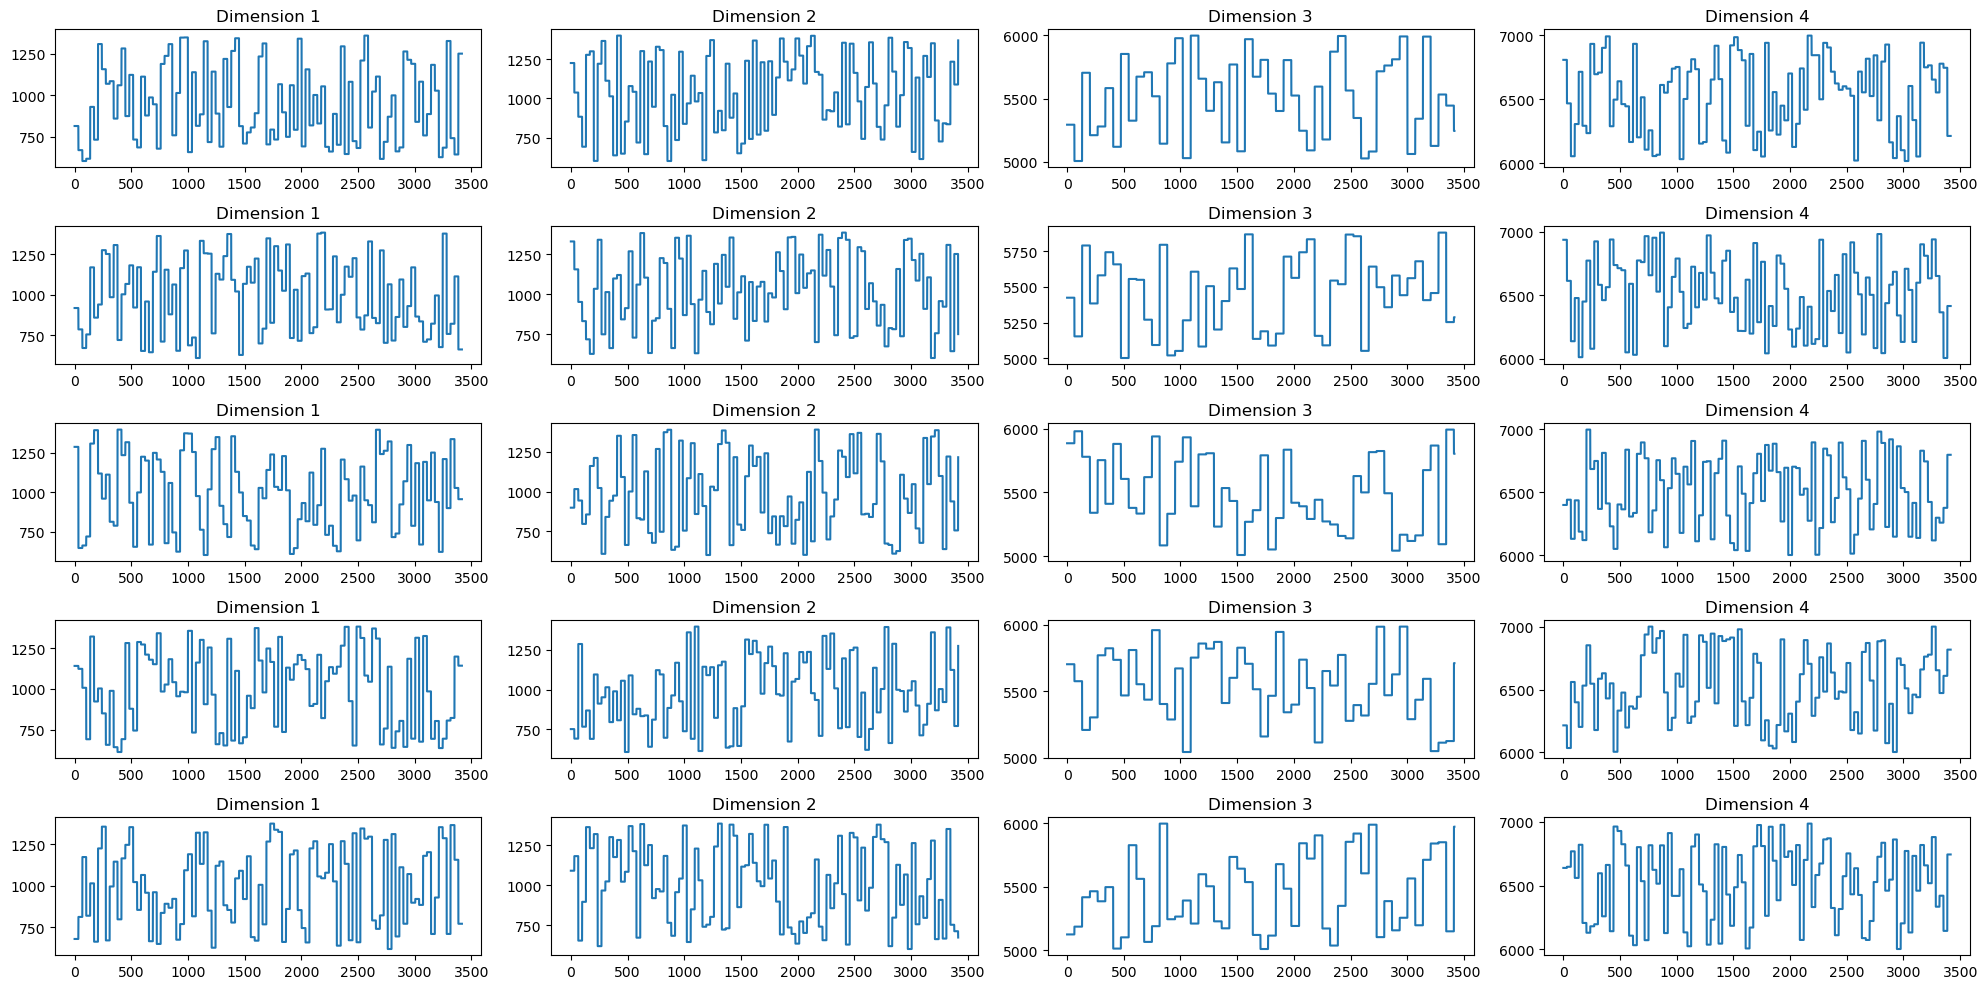

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming `x_dataset`, `u_dataset`, and the necessary scalers and transformations are defined

num_rows = len(ks)
num_cols = 4  # Reflects the 4D nature of each dataset in u_dataset

num_plots = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 2))

for dataset_idx, k in enumerate(ks):
    uu = u_dataset[k]  # Retrieve dataset

    for j in range(num_cols):
        ax = axes[dataset_idx, j]
        ax.plot(uu[:, j])  # Plot each dimension of the dataset
        ax.set_title(f'Dimension {j + 1}')

plt.tight_layout()
plt.show()


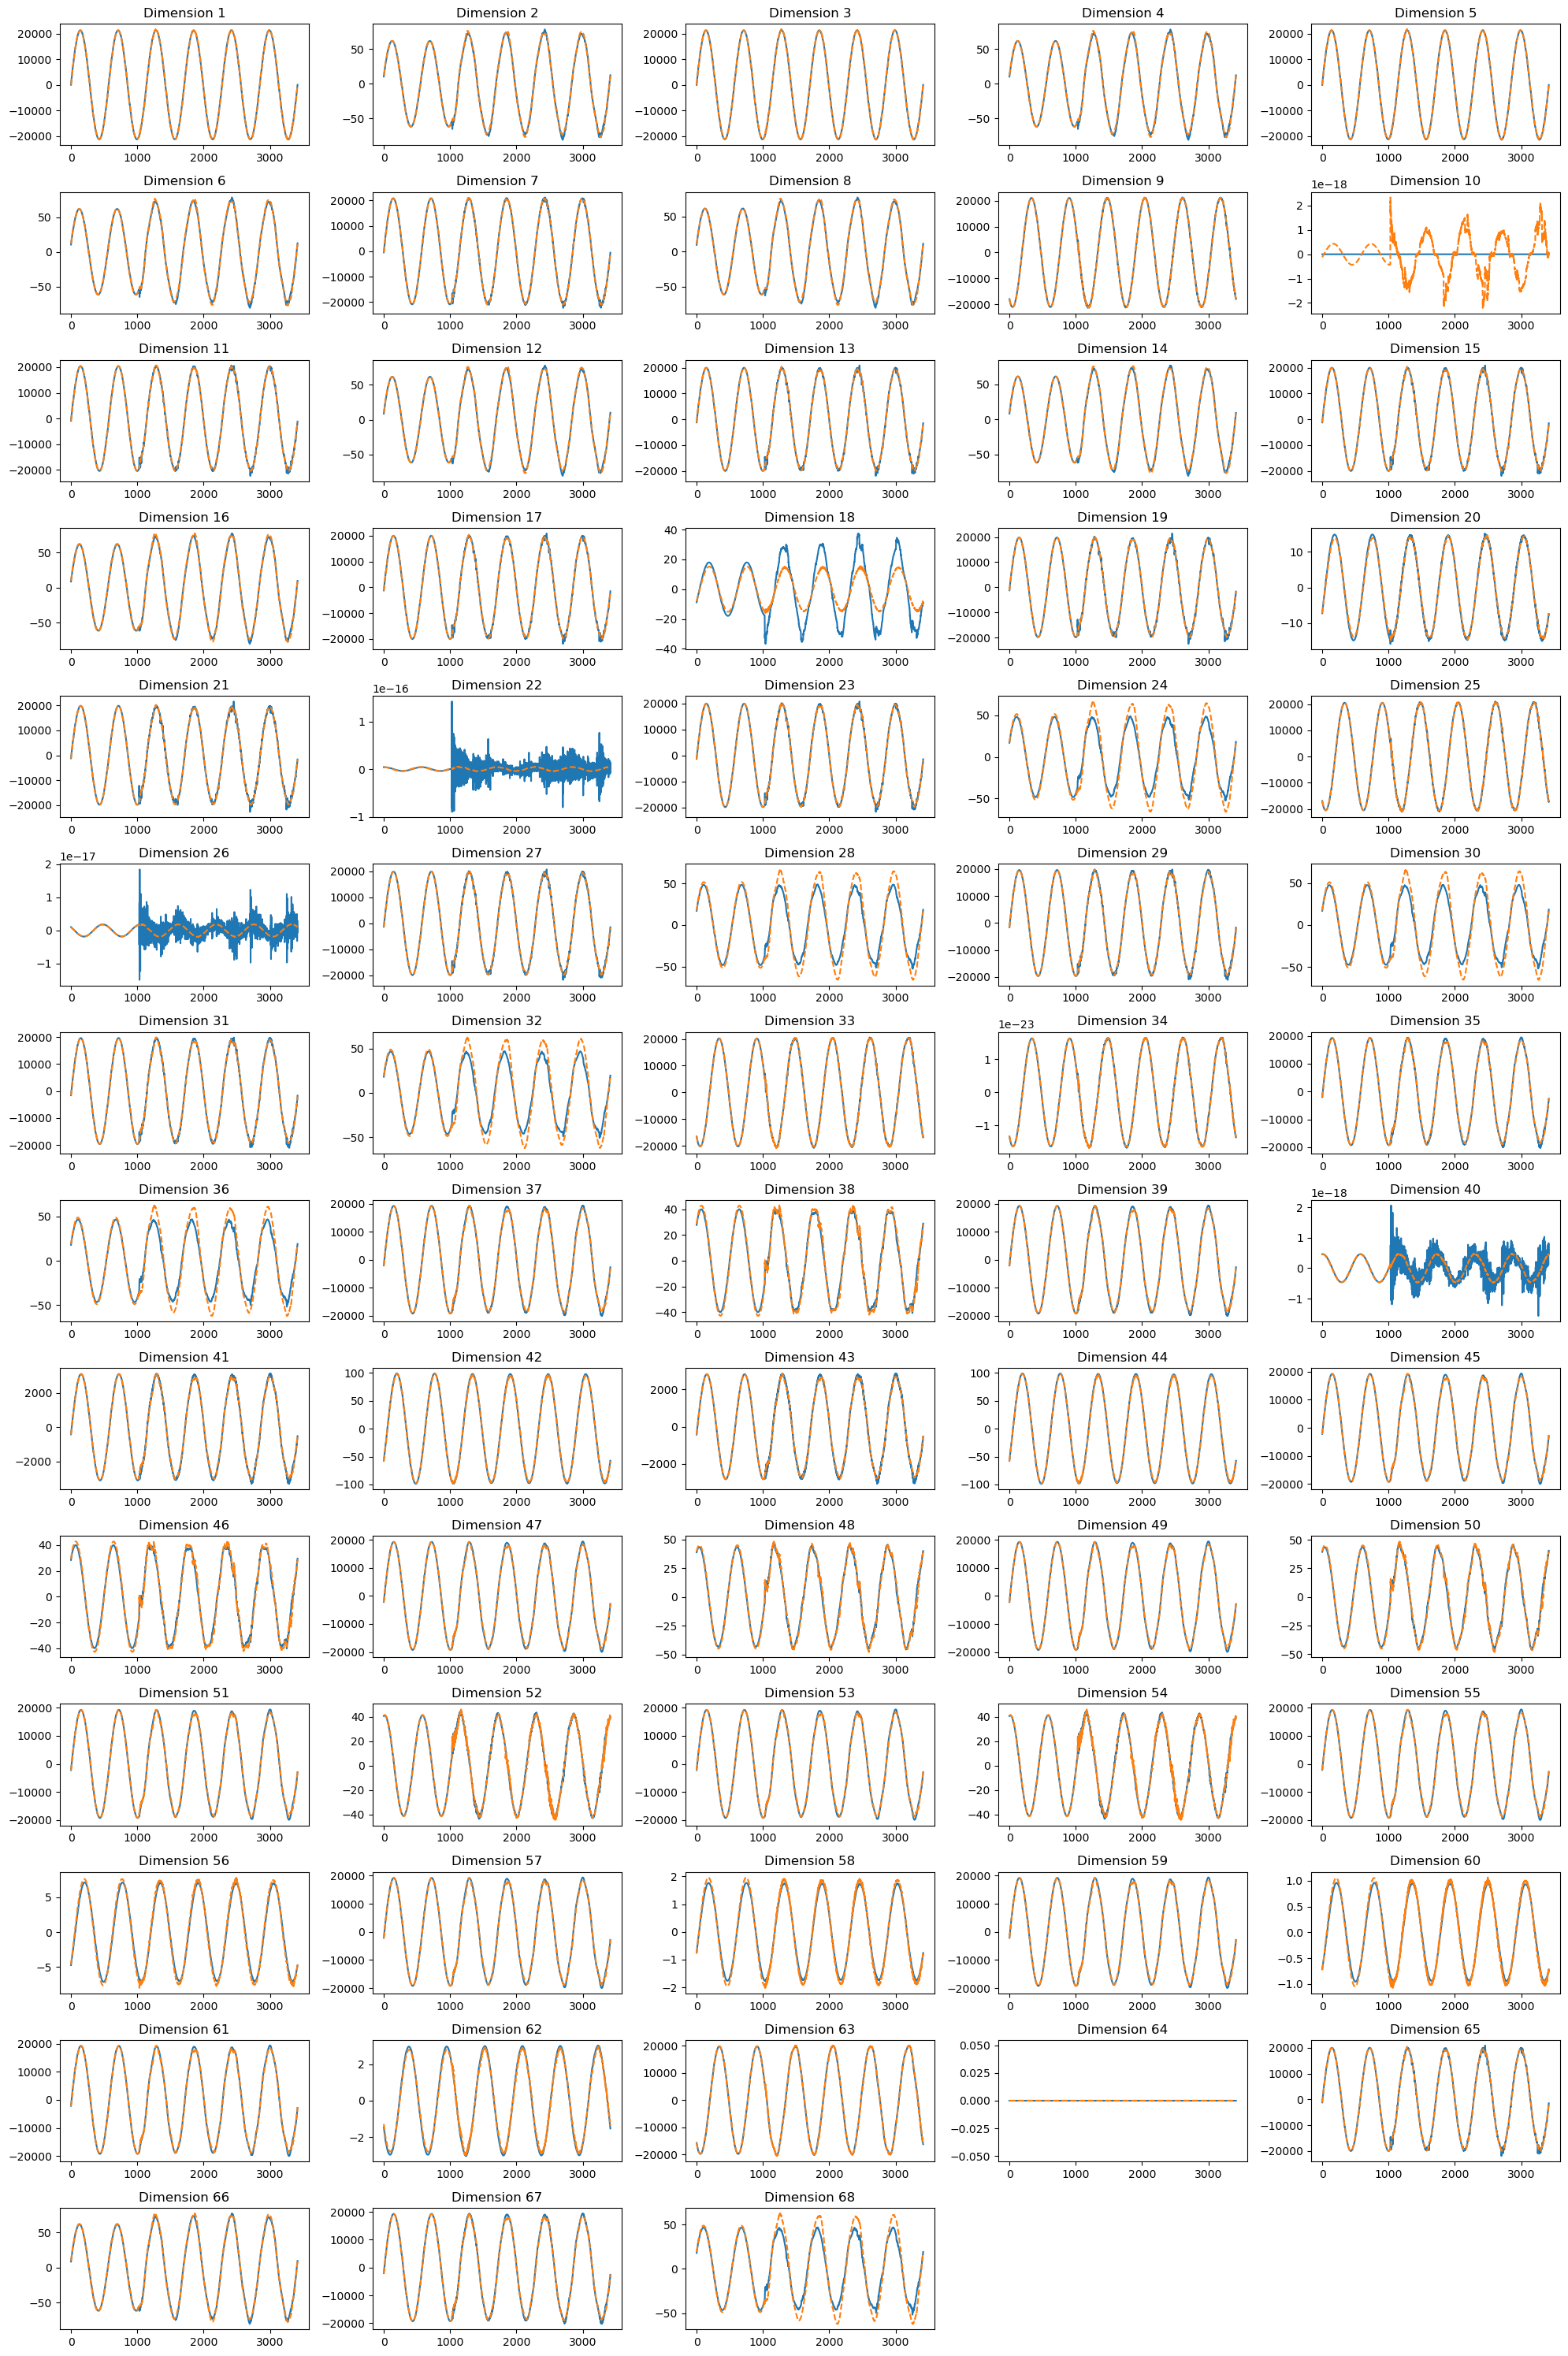

In [10]:
import numpy as np
import matplotlib.pyplot as plt

k = 0
xx = x_dataset[k]
# xx = x_scaler.transform(xx)
xx_reconstruct = pca.inverse_transform(x_pca)
xx_reconstruct = x_scaler.inverse_transform(xx_reconstruct)

num_rows = 14
num_cols = 5

num_plots = num_rows * num_cols

# assert num_plots <= xx.shape[1]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < xx.shape[1]:
            axes[i, j].plot(xx[:, index], label='Original', linestyle='-')
            axes[i, j].plot(xx_reconstruct[:, index], label = 'Reconstructed', linestyle='--')
            axes[i, j].set_title(f'Dimension {index + 1}')
        else:
            axes[i, j].axis('off')

plt.tight_layout()

plt.show()


In [11]:
import torch
from torch import nn
class MinMaxScalerLayer(nn.Module):
    def __init__(self, min_val, max_val):
        super(MinMaxScalerLayer, self).__init__()
        self.min_val = nn.Parameter(torch.tensor(min_val, dtype=torch.float32), requires_grad=False)
        self.max_val = nn.Parameter(torch.tensor(max_val, dtype=torch.float32), requires_grad=False)

    def transform(self, x):
        return (x - self.min_val) / (self.max_val - self.min_val)
    
    def inverse_transform(self, input):
        return input * (self.max_val - self.min_val) + self.min_val